<a href="https://colab.research.google.com/github/Rohan-pashikanti/AIML_Batch_5/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2

Part 1 – Implement Breadth First Search Algorithm using a Queue

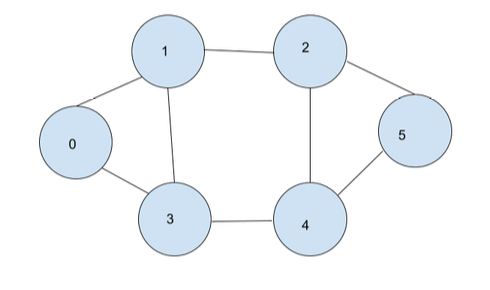

In [ ]:
from queue import Queue

graph = {0: [1, 3], 1: [0, 2, 3], 2: [4, 1, 5], 3: [4, 0, 1], 4: [2, 3, 5], 5: [4, 2], 6: []}
print("The adjacency List representing the graph is:")
print(graph)


def bfs(graph, source):
    Q = Queue()
    visited_vertices = set()
    Q.put(source)
    visited_vertices.update({0})
    while not Q.empty():
        vertex = Q.get()
        print(vertex, end="-->")
        for u in graph[vertex]:
            if u not in visited_vertices:
                Q.put(u)
                visited_vertices.update({u})

print("BFS traversal of graph with source 0 is:")
bfs(graph, 0)

The adjacency List representing the graph is:
{0: [1, 3], 1: [0, 2, 3], 2: [4, 1, 5], 3: [4, 0, 1], 4: [2, 3, 5], 5: [4, 2], 6: []}
BFS traversal of graph with source 0 is:
0-->1-->3-->2-->4-->5-->

Part 2 – Implement Depth First Search Algorithm using a Stack


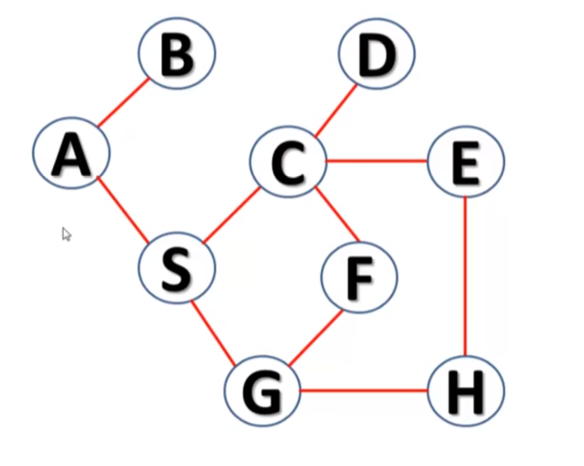

In [1]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=' ')
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

graph = {
    'a': ['b', 's'],
    'b': ['a'],
    's': ['a', 'c', 'g'],
    'c': ['d', 'e' ,'f' ,'s'],
    'd': ['c'],
    'e': ['c', 'h'],
    'h': ['g', 'e'],
    'f': ['c', 'g'],
    'g': ['f','s', 'h']
}

start_vertex = 'a'
print("Depth-First Traversal:")
dfs(graph, start_vertex)

Depth-First Traversal:
a b s c d e h g f 

Part 3 – Implement A* Algorithm using Numpy

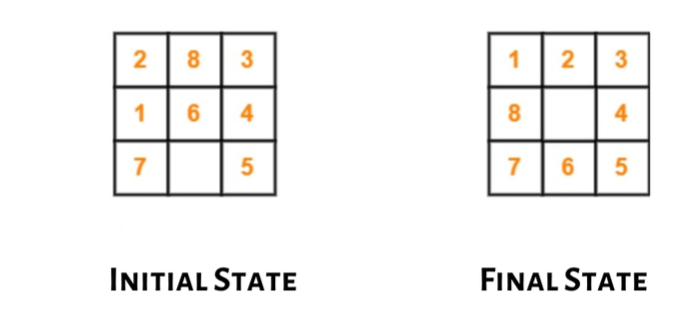

In [ ]:
import numpy as np

def misplaced_tiles(puzzle, goal):
    return np.sum(np.where(puzzle != goal, 1, 0)) - 1

def get_neighbors(puzzle):
    neighbors = []
    blank_pos = np.where(puzzle == 0)[0][0]
    row, col = divmod(blank_pos, 3)

    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in moves:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            new_blank_pos = new_row * 3 + new_col
            new_puzzle = puzzle.copy()
            new_puzzle[blank_pos], new_puzzle[new_blank_pos] = new_puzzle[new_blank_pos], new_puzzle[blank_pos]
            neighbors.append(new_puzzle)
    return neighbors

def a_star_8_puzzle(initial_state, goal_state):
    state = [{'puzzle': initial_state, 'parent': None, 'gn': 0, 'hn': misplaced_tiles(initial_state, goal_state)}]
    explored = []

    while state:
        state.sort(key=lambda x: x['gn'] + x['hn'])
        current = state.pop(0)
        explored.append(current['puzzle'].tobytes())

        if np.array_equal(current['puzzle'], goal_state):
            return reconstruct_path(current, explored)

        for neighbor in get_neighbors(current['puzzle']):
            if neighbor.tobytes() not in explored:
                gn = current['gn'] + 1
                hn = misplaced_tiles(neighbor, goal_state)
                state.append({'puzzle': neighbor, 'parent': current, 'gn': gn, 'hn': hn})

def reconstruct_path(node, explored):
    path = []
    while node['parent'] is not None:
        path.append(node['puzzle'])
        node = node['parent']
    path.append(node['puzzle'])
    return path[::-1]

initial_state = np.array([2, 8, 3, 1, 6, 4, 7, 0, 5])
goal_state = np.array([1, 2, 3, 8, 0, 4, 7, 6, 5])

solution_path = a_star_8_puzzle(initial_state, goal_state)
print("Solution Path:")
for step, state in enumerate(solution_path):
    print(f"Step {step}:\n{state.reshape(3, 3)}\n")

print(f"Total moves: {len(solution_path) - 1}")

Solution Path:
Step 0:
[[2 8 3]
 [1 6 4]
 [7 0 5]]

Step 1:
[[2 8 3]
 [1 0 4]
 [7 6 5]]

Step 2:
[[2 0 3]
 [1 8 4]
 [7 6 5]]

Step 3:
[[0 2 3]
 [1 8 4]
 [7 6 5]]

Step 4:
[[1 2 3]
 [0 8 4]
 [7 6 5]]

Step 5:
[[1 2 3]
 [8 0 4]
 [7 6 5]]

Total moves: 5
